(2134889, 8)
(2096851, 8)


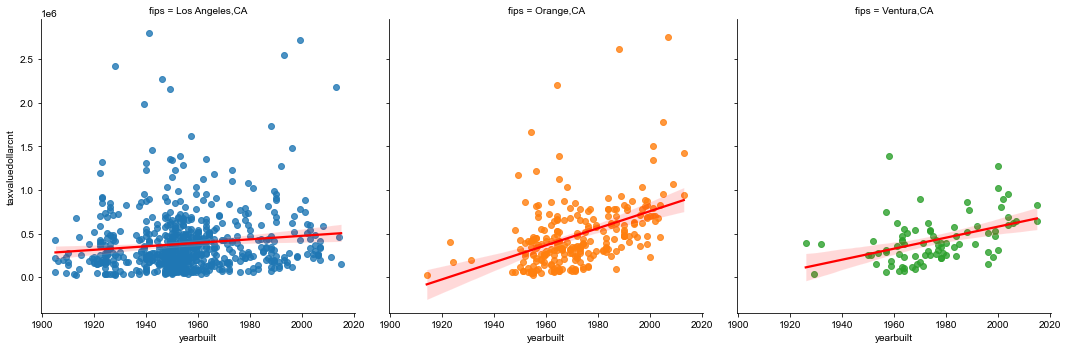

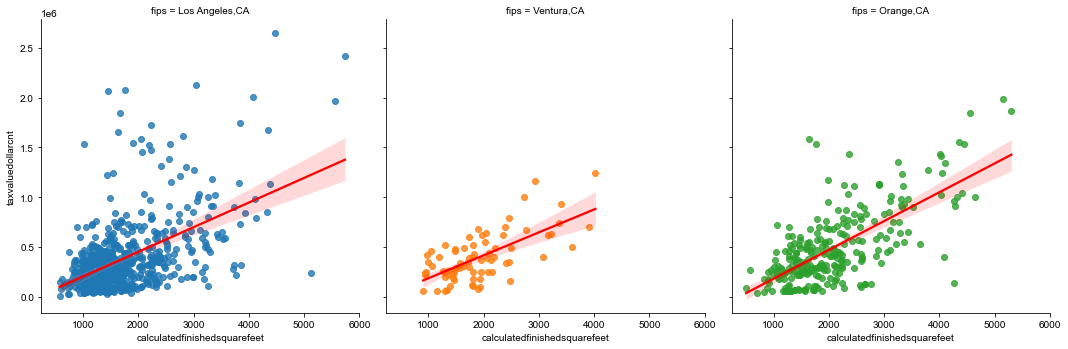

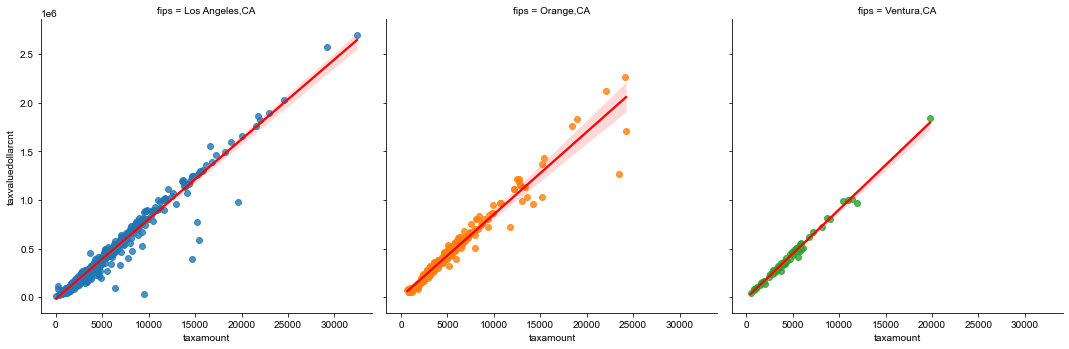

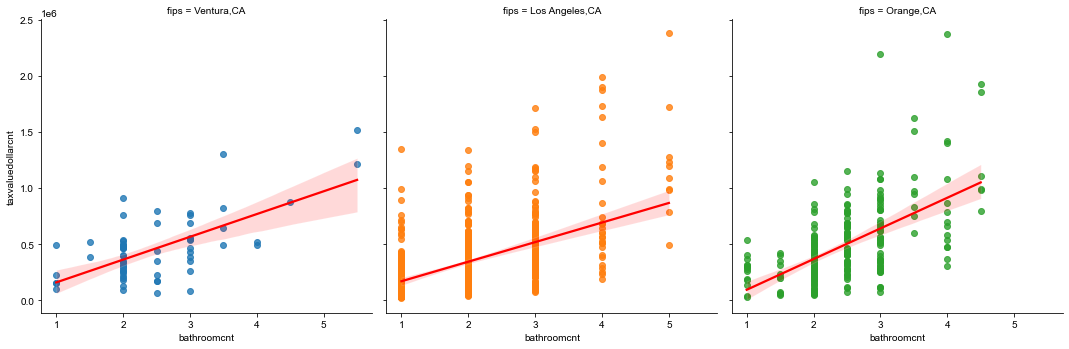

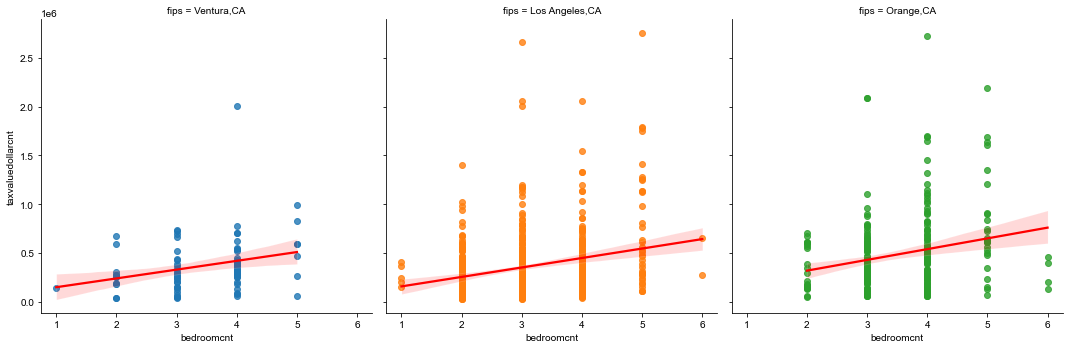

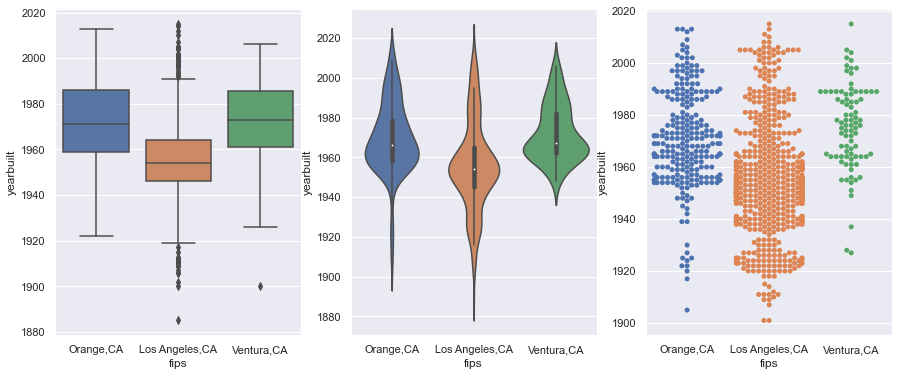

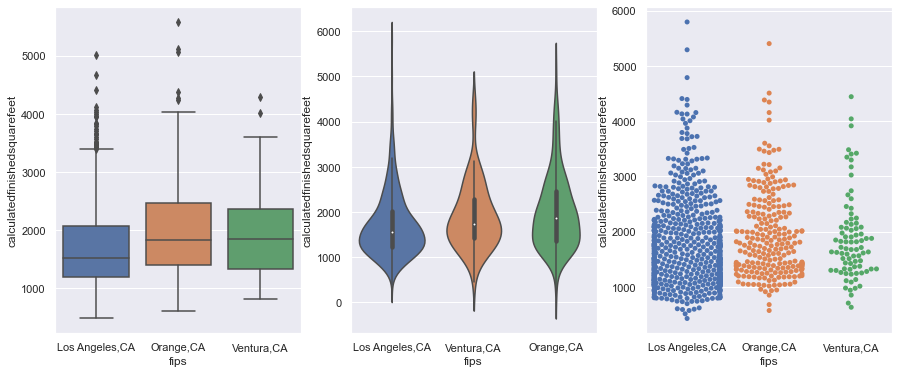

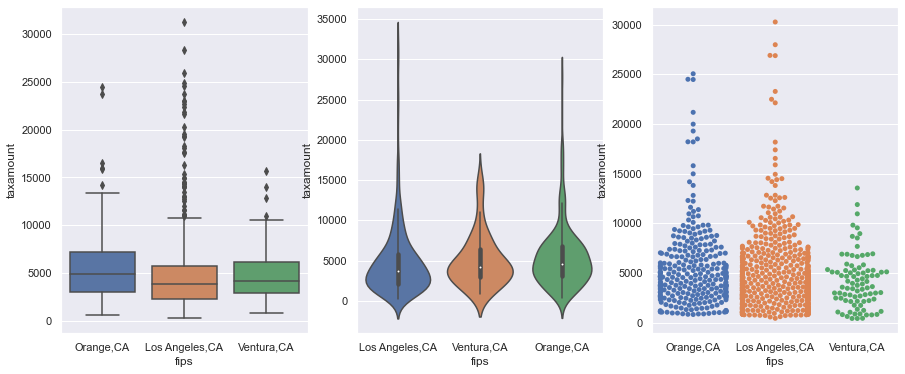

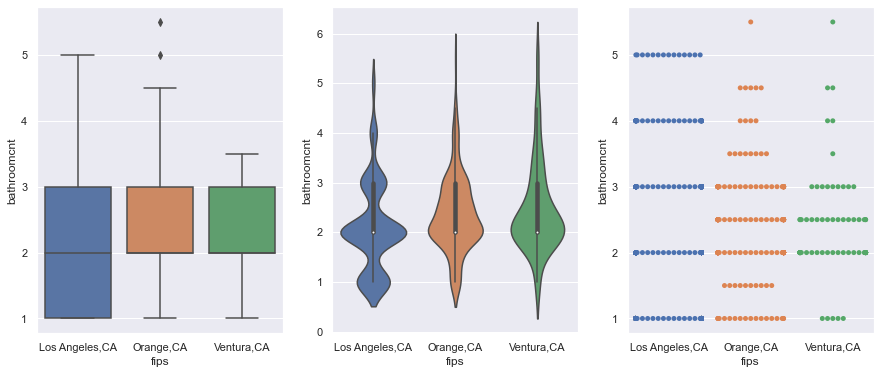

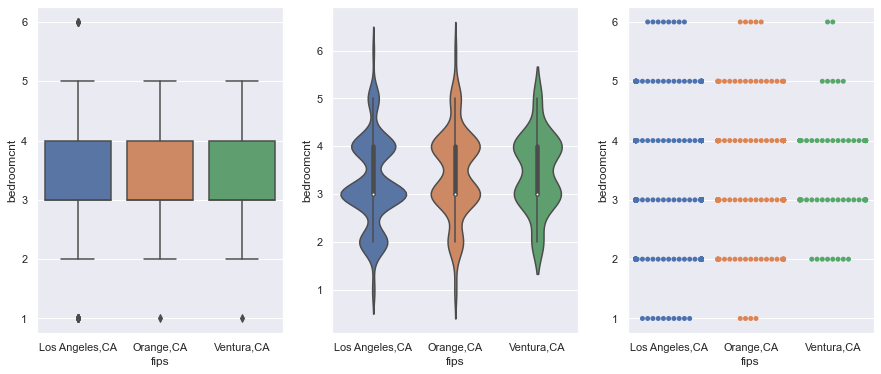

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")
import wrangle

In [2]:
train = wrangle.train
validate = wrangle.validate
test = wrangle.test
train

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1349905,11911489,6.0,3.0,2449.0,432773.0,1947,5931.25,"Los Angeles,CA"
258766,17138706,3.0,2.0,1599.0,211452.0,1976,2261.32,"Ventura,CA"
1244806,12815284,4.0,3.0,1969.0,380466.0,1965,4570.03,"Los Angeles,CA"
667578,14105307,5.0,2.5,2085.0,202010.0,1955,2527.40,"Orange,CA"
882530,11010017,6.0,5.0,4922.0,1107030.0,2002,13622.19,"Los Angeles,CA"
...,...,...,...,...,...,...,...,...
728188,12823382,3.0,2.0,1545.0,327671.0,1951,4082.33,"Los Angeles,CA"
1285982,12199184,2.0,1.0,1656.0,32357.0,1909,940.08,"Los Angeles,CA"
1929500,11345782,4.0,3.0,2544.0,514071.0,1999,6987.84,"Los Angeles,CA"
1770542,12300227,4.0,3.0,2512.0,399925.0,1947,5213.92,"Los Angeles,CA"


In [3]:
X_train = train.drop(columns=['fips'])
y_train = train.taxamount

X_validate = validate.drop(columns=['fips'])
y_validate = validate.taxamount

X_test = test.drop(columns=['fips'])
y_test = test.taxamount


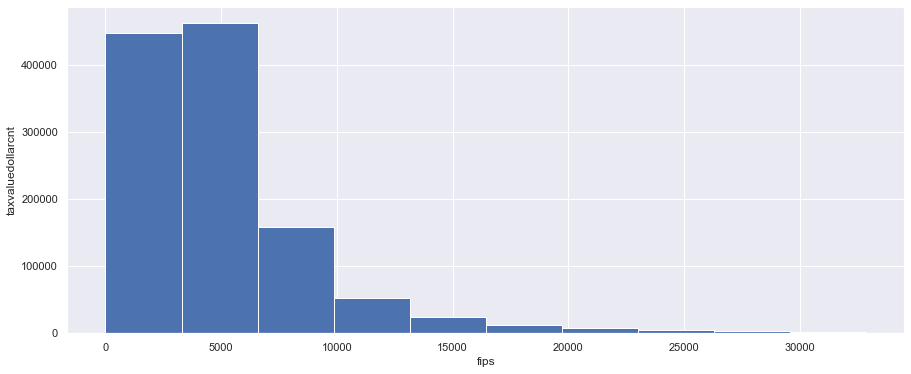

In [4]:
plt.hist(y_train)
plt.xlabel("fips")
plt.ylabel("taxvaluedollarcnt")
plt.show()


In [5]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict G3_pred_mean
G3_pred_mean = y_train['G3'].mean()
y_train['G3_pred_mean'] = G3_pred_mean
y_validate['G3_pred_mean'] = G3_pred_mean

# 2. compute G3_pred_median
G3_pred_median = y_train['G3'].median()
y_train['G3_pred_median'] = G3_pred_median
y_validate['G3_pred_median'] = G3_pred_median

# 3. RMSE of G3_pred_mean
rmse_train = mean_squared_error(y_train.G3, y_train.G3_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.G3, y_validate.G3_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of G3_pred_median
rmse_train = mean_squared_error(y_train.G3, y_train.G3_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.G3, y_validate.G3_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))


KeyError: 'G3'